<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/book1/exemplars/knn_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score


from sklearn.datasets.samples_generator import make_blobs
from  IPython import display
from matplotlib import pyplot as plt

import numpy as np

import pathlib
import shutil
import tempfile

from tqdm import tqdm

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# In this notebook we will walk through KNN clustering technique
# Here we generate isotropic Gaussian blobs by using the make_blob function from sklearn
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=6, random_state=42)
ntrain = 100
x_train = X[:ntrain]
y_train = y[:ntrain]
x_test = X[ntrain:]
y_test = y[ntrain:]

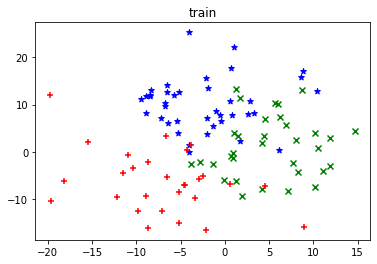

In [4]:
# Plotting the generated training dataset by class in a scatter plot
plt.figure()
y_unique = np.unique(y_train)
markers = '*x+'
colors = 'bgr'
for i in range(len(y_unique)):
  plt.scatter(x_train[y_train == y_unique[i], 0],
             x_train[y_train == y_unique[i], 1],
             marker=markers[i],
             c=colors[i])
plt.title('train')

plt.show()

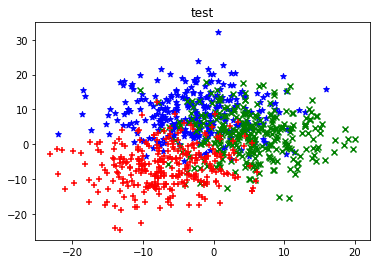

In [5]:
# Plotting the generated test dataset by class in a scatter plot
plt.figure()
for i in range(len(y_unique)):
  plt.scatter(x_test[y_test == y_unique[i], 0],
             x_test[y_test == y_unique[i], 1],
             marker=markers[i],
             c=colors[i])
plt.title('test')

plt.show()

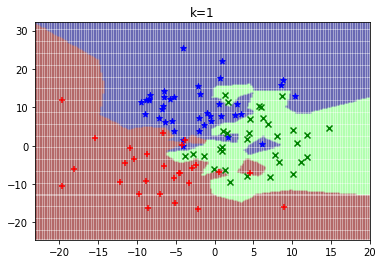

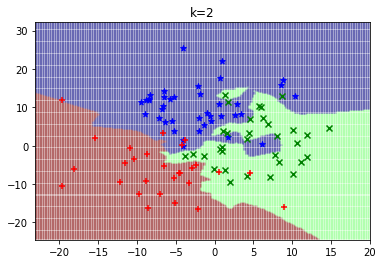

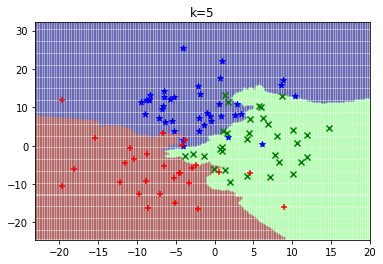

In [6]:
x = np.linspace(np.min(x_test[:, 0]), np.max(x_test[:, 0]), 200)
y = np.linspace(np.min(x_test[:, 1]), np.max(x_test[:, 1]), 200)
xx, yy = np.meshgrid(x, y)
xy = np.c_[xx.ravel(), yy.ravel()]

# Train a knn model and use the knn model to predict
for k in [1, 2, 5]:
  knn = KNN(n_neighbors=k)
  knn.fit(x_train, y_train)
  plt.figure()
  y_predicted = knn.predict(xy)
  
  plt.pcolormesh(xx, yy, y_predicted.reshape(200, 200), cmap='jet', alpha=0.2)
  for i in range(len(y_unique)):
      plt.scatter(x_train[y_train == y_unique[i], 0],
                 x_train[y_train == y_unique[i], 1],
                 marker=markers[i],
                 c=colors[i])
  plt.title('k=%s' % (k))
 
  plt.show()


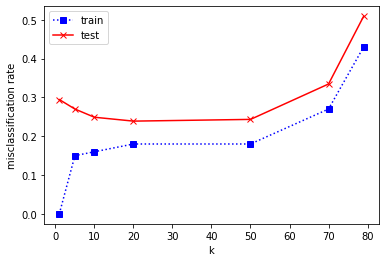

In [7]:
# plot train err and test err with different k
# ks = [int(n) for n in np.linspace(1, ntrain, 10)]
ks = [1, 5, 10, 20, 50, 70, 79]
train_errs = []
test_errs = []
for k in ks:
  knn = KNN(n_neighbors=k)
  knn.fit(x_train, y_train)
  train_errs.append(1 - knn.score(x_train, y_train))
  test_errs.append(1 - knn.score(x_test, y_test))
plt.figure()
plt.plot(ks, train_errs, 'bs:', label='train')
plt.plot(ks, test_errs, 'rx-', label='test')
plt.legend()
plt.xlabel('k')
plt.ylabel('misclassification rate')

plt.show()


Text(0.5, 1.0, '5-fold cross validation, n-train = 200')

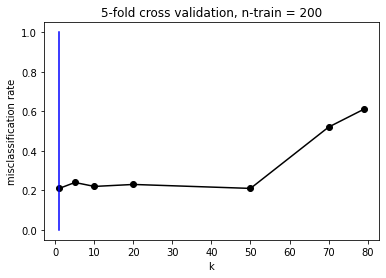

In [8]:
#cross_validate
scores = []
for k in ks:
    knn = KNN(n_neighbors=k)
    score = cross_val_score(knn, x_train, y_train, cv=5)
    scores.append(1 - score.mean())
plt.figure()
plt.plot(ks, scores, 'ko-')
min_k = ks[np.argmin(scores)]
plt.plot([min_k, min_k], [0, 1.0], 'b-')
plt.xlabel('k')
plt.ylabel('misclassification rate')
plt.title('5-fold cross validation, n-train = 200')


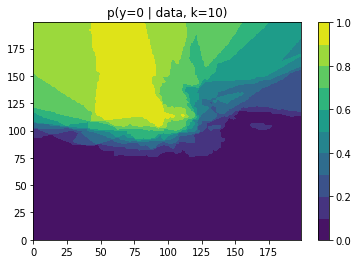

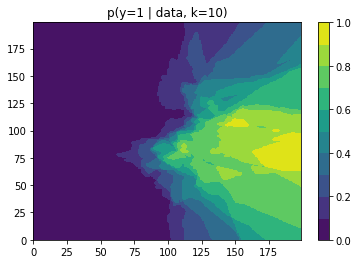

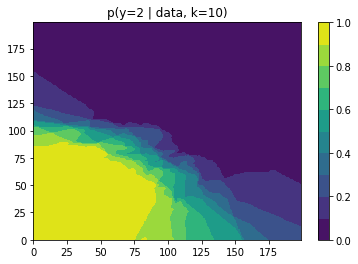

In [9]:

#draw hot-map to show the probability of different class
knn = KNN(n_neighbors=10)
knn.fit(x_train, y_train)
xy_predic = knn.predict_proba(xy)
levels = np.arange(0, 1.01, 0.1)
for i in range(3):
    plt.figure()
    plt.contourf(xy_predic[:, i].ravel().reshape(200, 200), levels)
    plt.colorbar()
    plt.title('p(y=%s | data, k=10)' % (i))
plt.show()

Accuracy: 0.935
Confusion Matrix:
 [[ 85   5]
 [  8 102]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93        90
           1       0.95      0.93      0.94       110

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200

Best parameters: {'knn__n_neighbors': 11}
Best Model Accuracy: 0.945
Best Model Confusion Matrix:
 [[ 87   3]
 [  8 102]]
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94        90
           1       0.97      0.93      0.95       110

    accuracy                           0.94       200
   macro avg       0.94      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200



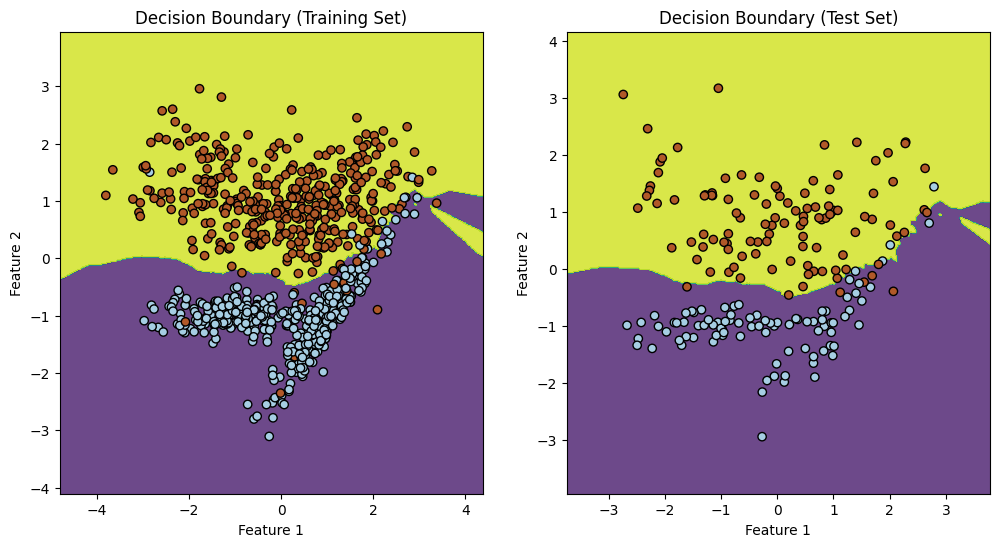

ROC AUC: 0.987979797979798


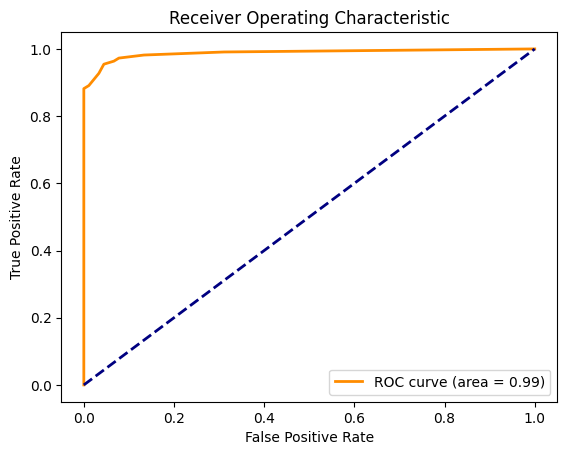

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

# 生成实验数据
X, y = make_classification(n_samples=1000, n_informative=2, n_redundant=0, n_features=2, n_classes=2, random_state=0)

# 将数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# (1) 不使用管道器，手动执行数据标准化、主成分分析和K最近邻预测
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)
y_pred = knn.predict(X_test_pca)

# 输出结果
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

# (2) 使用管道器进行相同的操作
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('knn', KNeighborsClassifier())
])

# 网格搜索最佳参数
param_grid = {'knn__n_neighbors': range(1, 101, 10)}
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("Best parameters:", grid_search.best_params_)

# 使用最佳参数的模型进行预测
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# 输出结果
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)

print("Best Model Accuracy:", accuracy_best)
print("Best Model Confusion Matrix:\n", conf_matrix_best)
print("Best Model Classification Report:\n", report_best)

# 使用课本提供的函数绘制预测边界
def plot_decision_boundary(X, y, model):
    h = .02  # 步长
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')

# 绘制预测边界
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(X_train, y_train, best_model)
plt.title('Decision Boundary (Training Set)')
plt.subplot(1, 2, 2)
plot_decision_boundary(X_test, y_test, best_model)
plt.title('Decision Boundary (Test Set)')
plt.show()

# 计算ROC曲线及其下面积
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()